In [6]:
import sys, math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [7]:
## functions

def get_pairs(n_rows, n_cols):
    for i in range(n_rows):
        for j in range(n_cols):
            yield(i,j)
            ## This yielding may look strange 
            ## but is the only way I found to later
            ## pass the code to the axes.

In [8]:
! ls  ../lab-cleaning-categorical-data/files_for_lab/

we_fn_use_c_marketing_customer_value_analysis.csv


1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [9]:
categorical = pd.read_csv('../lab-cleaning-categorical-data/categorical.csv')

In [10]:
! ls ../lab-cleaning-categorical-data/

categorical.csv                 files_for_lab
cleaning_categorical_data.ipynb readme.md
continuous_df.csv


In [11]:
continuous_df = pd.read_csv('../lab-cleaning-categorical-data/continuous_df.csv')
continuous_df = continuous_df.set_index(continuous_df.columns[0])
continuous_df.index.name = 'index'
categorical.index.name = 'index'

In [12]:
continuous_df.index

Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9123, 9124, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133],
           dtype='int64', name='index', length=8781)

In [13]:
categorical = categorical.loc[continuous_df.index]

<AxesSubplot:xlabel='state', ylabel='income'>

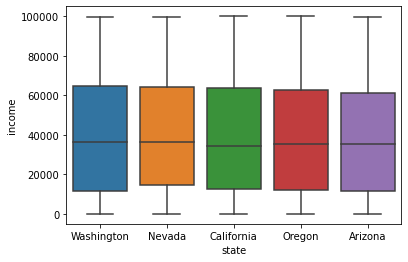

In [14]:
sns.boxplot(x=categorical.state, y=continuous_df.income)

In [43]:
def draw_boxplots(numerical_df, categorical_df):
    
    def enconde_df(df):
        for column_name in df.columns:
            le = LabelEncoder()
            yield le.fit_transform(df[column_name])
                
    ## Prepare to plot
    cat_array = [i for i in enconde_df(categorical)] 
    ## The reason I Label enconde the data
    ## is because in some columns so many text gets messy.
    ax_indexes = [(0,0),(0,1),(1,0),(1,1)]
    
    print(cat_array[0])
    
    for i in range(len(categorical.columns)): # We use index because the data has been encoded
        fig, axs = plt.subplots(2,2,figsize=(8,8))
        for j in range(len(numerical_df.columns)):
            sns.boxplot(x=cat_array[i], y=numerical_df[numerical_df.columns[i]], ax=axs[ax_indexes[j]])
        plt.show()
        
    return 0
        
    
#     fig, axs = plt.subplots(n_rows,n_cols,figsize=(10,3 * n_rows))
#     for i in range(len(cat_array)):
#         sns.boxplot(x=cat_array[i], 
#                     y=y_column, ax=axs[pairs[i]])
#         axs[pairs[i]].title.set_text(categorical.columns[i])
#     plt.tight_layout()
#     plt.show()

In [32]:
data = continuous_df

In [29]:
test_df = categorical['state response coverage education'.split()]

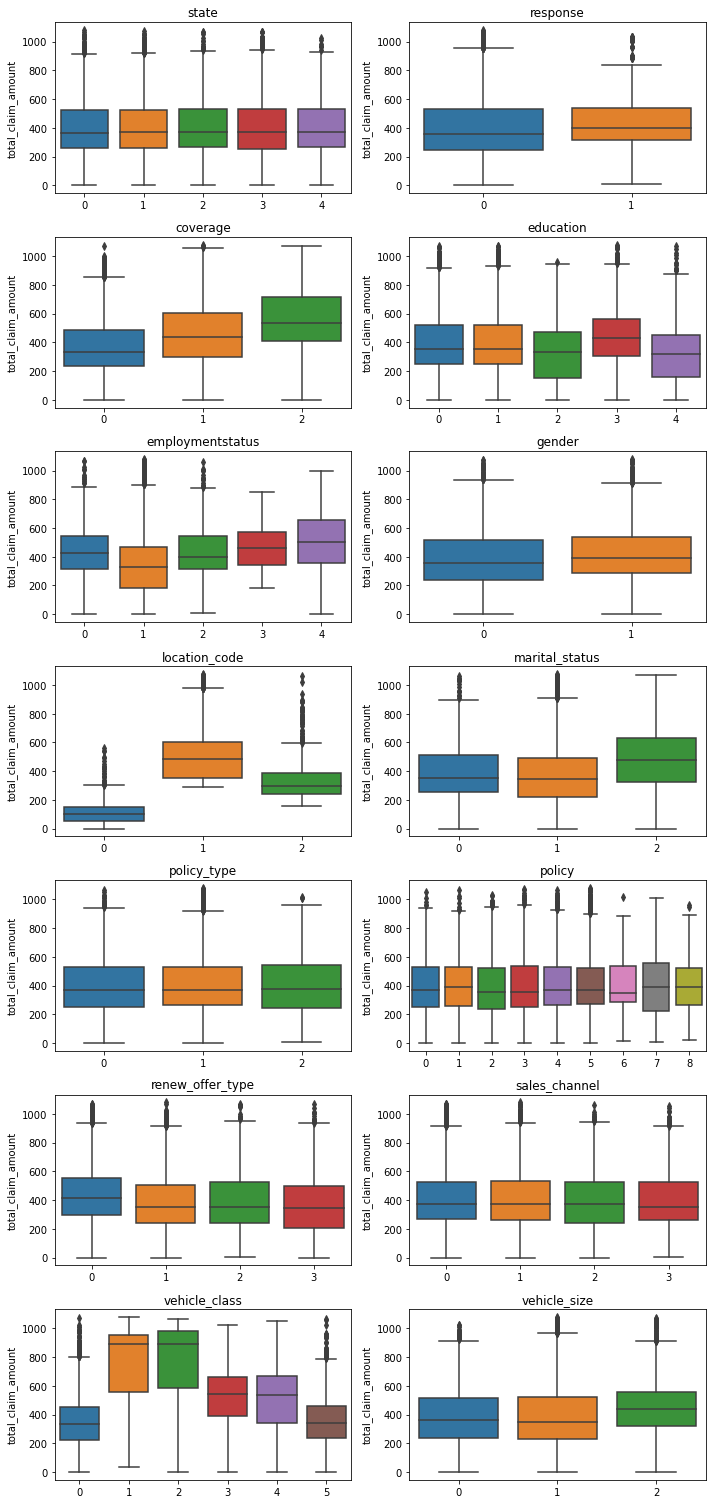

In [259]:
print('\n')
print(data.columns[2])
print('\n\n')
draw_boxplots(data[data.columns[2]], categorical, n_rows=7, n_cols=2)

In [ ]:
## 3) It looks thare is a lot of redundancy on state and sales chanel.
## 4) The time variable is being considered as a continuous variable because
## of its behaviour.